In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import clear_output

!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py -O fields.py
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/upshot-trump-emolex/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt -P data
clear_output()

In [3]:
import pandas as pd
filepath = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
nrc = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
nrc.head(20)

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [4]:
nrc = nrc[(nrc != 0).all(1)] # 유의미한 라벨만 추출 association 값이 1인 것만
nrc = nrc.reset_index(drop = True) # index reset
nrc.head(10)

,word,emotion,association
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1
5,abandoned,fear,1
6,abandoned,negative,1
7,abandoned,sadness,1
8,abandonment,anger,1
9,abandonment,fear,1


In [5]:
created_at = ['21.09.22', '21.09.23', '21.09.24', '21.09.25', '21.09.26', '21.09.27', '21.09.28', 
              '21.09.29', '21.09.30', '21.10.01', '21.10.02', '21.10.03', '21.10.04', '21.10.05']
sentiments = ['trust', 'joy', 'anger', 'sadness', 'fear', 'disgust', 'surprise', 'anticipation']
daily_report = pd.DataFrame(index = created_at, columns = sentiments)

negative        24814
fear            18590
positive        17177
sadness         16163
anticipation    14609
trust           12558
anger           10016
surprise         8414
disgust          7444
joy              5511
dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


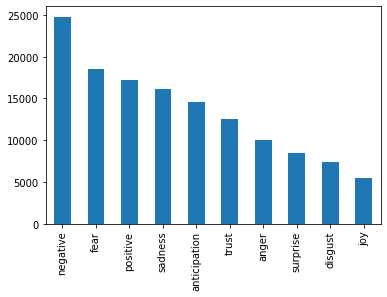

In [23]:
import fields
import numpy as np
import json

fieldsFilter = fields.fields
fileN = '/content/drive/MyDrive/covid analysis/preprocessed_stem_2/preprocssed_1003.json'
text_object = []
with open(fileN, 'r') as json_file:
  for line in json_file:
    text_object.append(json.loads(line))

tw = pd.json_normalize(text_object)
tw = tw.loc[:, tw.columns.isin(fieldsFilter)]

def sentiment(text) :
  match_words = [x for x in text if x in list(nrc['word'])] # 사전과 매칭

  for i in match_words:
      temp = list(nrc.iloc[np.where(nrc['word'] == i)[0],1])
      for j in temp:
          emotion.append(j)

emotion=[]
tw['text'] = tw['text'].apply(lambda x : sentiment(x))
sentiment_result1 = pd.Series(emotion).value_counts()
print(sentiment_result1, sentiment_result1.plot.bar())

In [13]:
created_at = pd.date_range("2021-09-22", "2021-10-05", freq = 'D')
sentiments = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
daily_report = pd.DataFrame(index = created_at, columns = sentiments)

In [42]:
score_0922 = [14430, 25775, 9962, 28366, 10228, 24889, 12776, 24549]
score_0923 = [15990, 22880, 10361, 28326, 9725, 24796, 13085, 22861]
score_0924 = [13318, 20648, 9168, 26674, 9102, 23758, 11446, 21095]
score_0925 = [9430, 13845, 6462, 17402, 5828, 15458, 7610, 14174]
score_0926 = [9294, 13823, 6395, 17723, 5588, 15148, 7550, 12546] #positive보다도 fear가 높음
score_0927 = [13929, 22508, 7640, 26432, 9193, 22607, 12876, 20843]
score_0928 = [12953, 24371, 8746, 25887, 9610, 22135, 11531, 21189]
score_0929 = [13053, 20849, 8740, 26219, 8339, 22187, 11022, 20637]
score_0930 = [10862, 18190, 7672, 22136, 6623, 18893, 9226, 17479]
score_1001 = [17428, 30191, 12693, 30842, 9740, 24451, 16826, 25664]
score_1002 = [13485, 18190, 9580, 21945, 6016, 19332, 11241, 14503] #positive보다 fear, sadnesss가 높음
score_1003 = [10016, 14609, 7444, 18590, 5511, 16163, 8414, 12558] #positive보다도 fear가 높음
score_1004 = [11189, 18477, 8037, 22440, 7349, 19480, 9272, 17955]
score_1005 = [11783, 19592, 8423, 23735, 7569, 20356, 10534, 18626]

for i in range(len(score_0924)):
  daily_report.iloc[13][i] = score_1005[i]
print(daily_report)

            anger anticipation disgust   fear    joy sadness surprise  trust
2021-09-22  14430        25775    9962  28366  10228   24889    12776  24549
2021-09-23  15990        22880   10361  28326   9725   24796    13085  22861
2021-09-24  13318        20648    9168  26674   9102   23758    11446  21095
2021-09-25   9430        13845    6462  17402   5828   15458     7610  14174
2021-09-26   9294        13823    6395  17723   5588   15148     7550  12546
2021-09-27  13929        22508    7640  26432   9193   22607    12876  20843
2021-09-28  12953        24371    8746  25887   9610   22135    11531  21189
2021-09-29  13053        20849    8740  26219   8339   22187    11022  20637
2021-09-30  10862        18190    7672  22136   6623   18893     9226  17479
2021-10-01  17428        30191   12693  30842   9740   24451    16826  25664
2021-10-02  13485        18190    9580  21945   6016   19332    11241  14503
2021-10-03  10016        14609    7444  18590   5511   16163     8414  12558

In [43]:
sum_daily8 = []
for i in sentiments :
  sum_daily8.append(daily_report[i].sum())
print(sum_daily8)

[177160, 283948, 121323, 336717, 110421, 289653, 153409, 264679]


In [44]:
total = sum(sum_daily8)
for i in range(len(sum_daily8)):
  sum_daily8[i] = sum_daily8[i]/total*100
print(sum_daily8)

[10.197374101340579, 16.34411820573185, 6.983382355480599, 19.3815151009319, 6.355860496975209, 16.67249943878755, 8.83026057525715, 15.234989725495163]


In [45]:
sum_date = daily_report.sum(axis=1)
print(sum_date)

daily_ratio = pd.DataFrame(index = created_at, columns = sentiments)
for i in range(len(created_at)):
  for j in range(len(sentiments)):
    daily_ratio.iloc[i][j] = daily_report.iloc[i][j] / sum_date.iloc[i] * 100
print(daily_ratio)

2021-09-22    150975.0
2021-09-23    148024.0
2021-09-24    135209.0
2021-09-25     90209.0
2021-09-26     88067.0
2021-09-27    136028.0
2021-09-28    136422.0
2021-09-29    131046.0
2021-09-30    111081.0
2021-10-01    167835.0
2021-10-02    114292.0
2021-10-03     93305.0
2021-10-04    114199.0
2021-10-05    120618.0
Freq: D, dtype: float64
              anger anticipation  disgust  ...  sadness surprise    trust
2021-09-22  9.55787      17.0724  6.59844  ...  16.4855  8.46233  16.2603
2021-09-23  10.8023       15.457  6.99954  ...  16.7513  8.83978  15.4441
2021-09-24  9.84994      15.2712  6.78061  ...  17.5713  8.46541  15.6018
2021-09-25  10.4535      15.3477  7.16337  ...  17.1358  8.43597  15.7124
2021-09-26  10.5533       15.696  7.26152  ...  17.2005  8.57302   14.246
2021-09-27  10.2398      16.5466  5.61649  ...  16.6194   9.4657  15.3226
2021-09-28   9.4948      17.8644  6.41099  ...  16.2254  8.45245   15.532
2021-09-29  9.96062      15.9097  6.66941  ...  16.9307  8.410

In [28]:
origin_pn = pd.DataFrame(index = created_at, columns = ['positive', 'negative'])
pn_0922 = [33300, 39379]
pn_0923 = [30542, 38657]
pn_0924 = [28118, 35541]
pn_0925 = [18040, 23559]
pn_0926 = [17270, 23493]
pn_0927 = [27961, 34536]
pn_0928 = [29181, 34755]
pn_0929 = [27179, 35513]
pn_0930 = [22370, 29864]
pn_1001 = [32579, 37855]
pn_1002 = [21945, 29237]
pn_1003 = [18590, 24814]
pn_1004 = [23981, 29934]


In [46]:
pn_1005 = [24570, 30853]
for i in range(len(pn_0922)):
  origin_pn.iloc[13][i] = pn_1005[i]
print(origin_pn)

           positive negative
2021-09-22    33300    39379
2021-09-23    30542    38657
2021-09-24    28118    35541
2021-09-25    18040    23559
2021-09-26    17270    23493
2021-09-27    27961    34536
2021-09-28    29181    34755
2021-09-29    27179    35513
2021-09-30    22370    29864
2021-10-01    32579    37855
2021-10-02    21945    29237
2021-10-03    18590    24814
2021-10-04    23981    29934
2021-10-05    24570    30853


In [47]:
daily_pn = pd.DataFrame(index = created_at, columns = ['positive', 'negative'])
for i in range(2):
  for j in range(len(created_at)):
    daily_pn.iloc[j][i] = 0


for j in range(len(created_at)):
  for i in range(len(sentiments)) :
    if i == 4 or i == 7:
      daily_pn.iloc[j][0] += daily_report.iloc[j][i]
    elif i == 0 or i == 2 or i == 3 or i == 5:
      daily_pn.iloc[j][1] += daily_report.iloc[j][i]

print(daily_pn)

           positive negative
2021-09-22    34777    77647
2021-09-23    32586    79473
2021-09-24    30197    72918
2021-09-25    20002    48752
2021-09-26    18134    48560
2021-09-27    30036    70608
2021-09-28    30799    69721
2021-09-29    28976    70199
2021-09-30    24102    59563
2021-10-01    35404    85414
2021-10-02    20519    64342
2021-10-03    18069    52213
2021-10-04    25304    61146
2021-10-05    26195    64297


# Line Chart

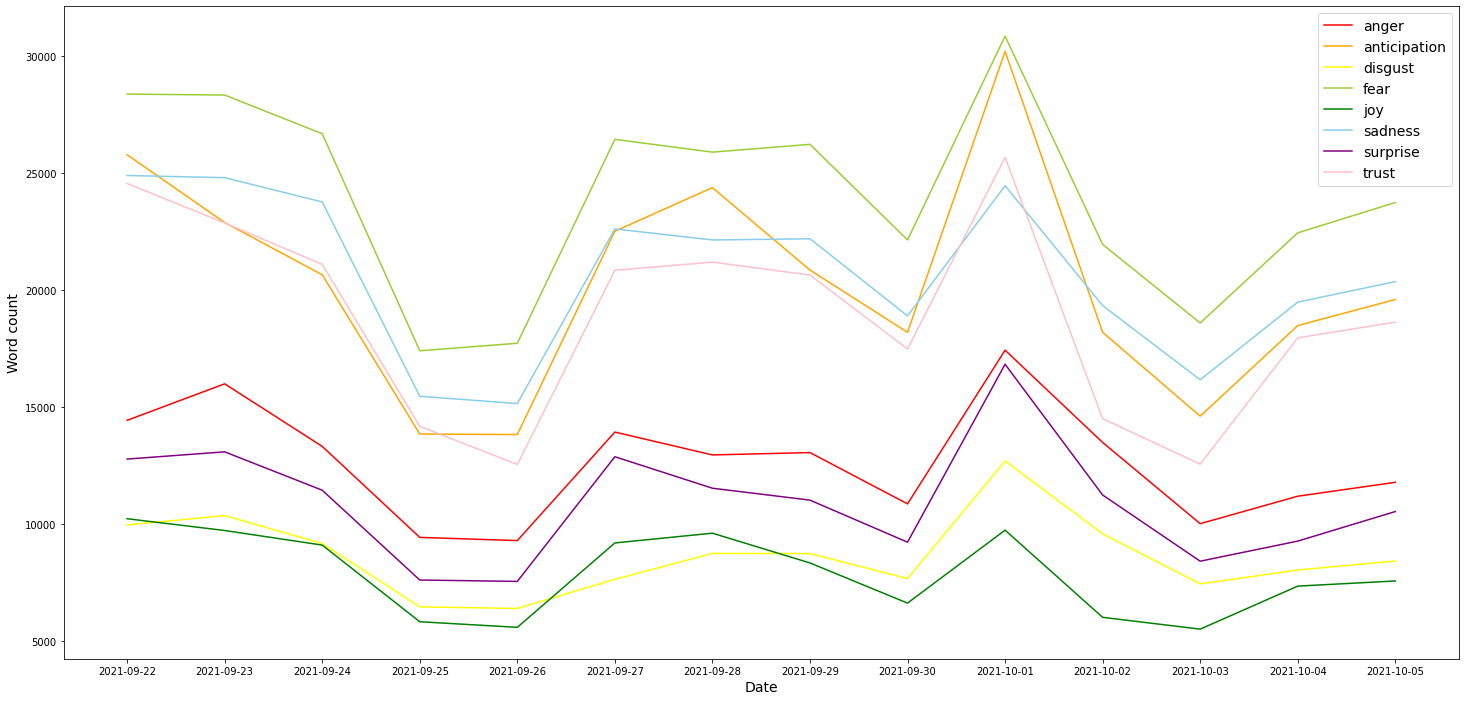

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 12))

plt.plot(daily_report.anger, color = 'red')
plt.plot(daily_report.anticipation, color = 'orange')
plt.plot(daily_report.disgust, color = 'yellow')
plt.plot(daily_report.fear, color = 'yellowgreen')
plt.plot(daily_report.joy, color = 'green')
plt.plot(daily_report.sadness, color = 'skyblue')
plt.plot(daily_report.surprise, color = 'purple')
plt.plot(daily_report.trust, color = 'pink')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Word count", fontsize = 14)
plt.legend(sentiments, loc = 'best', fontsize = 14)
plt.show()

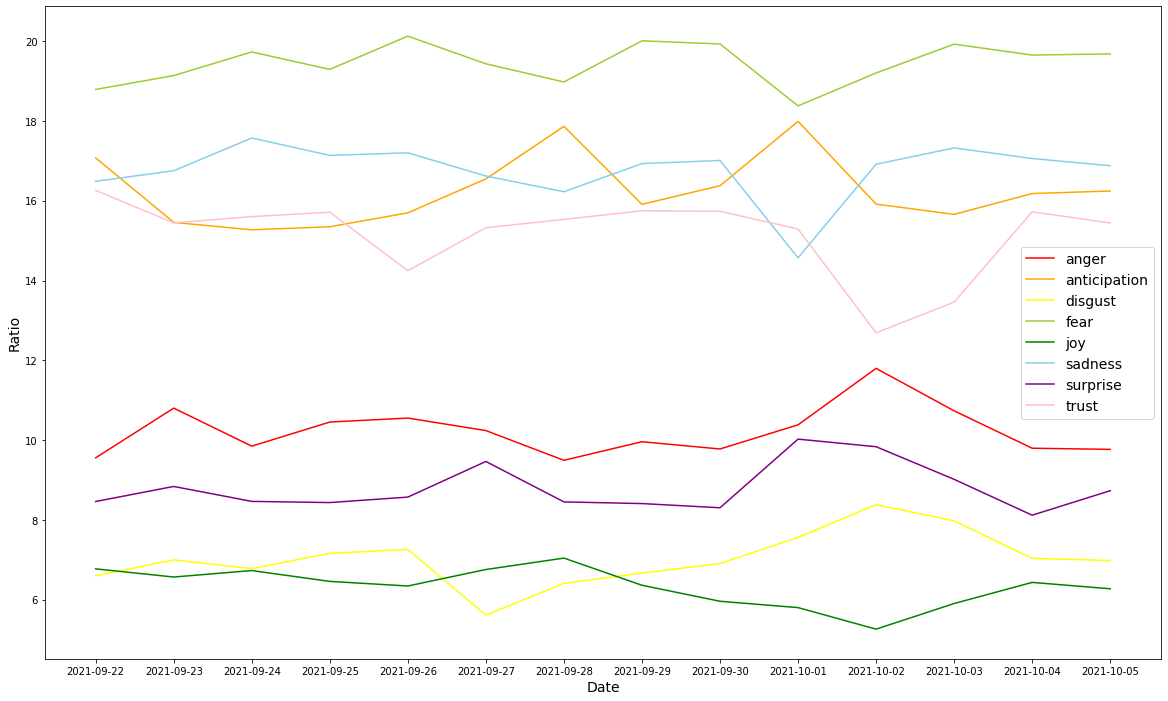

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))

plt.plot(daily_ratio.anger, color = 'red')
plt.plot(daily_ratio.anticipation, color = 'orange')
plt.plot(daily_ratio.disgust, color = 'yellow')
plt.plot(daily_ratio.fear, color = 'yellowgreen')
plt.plot(daily_ratio.joy, color = 'green')
plt.plot(daily_ratio.sadness, color = 'skyblue')
plt.plot(daily_ratio.surprise, color = 'purple')
plt.plot(daily_ratio.trust, color = 'pink')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Ratio", fontsize = 14)
plt.legend(sentiments, loc = 7, fontsize = 14)
plt.show()

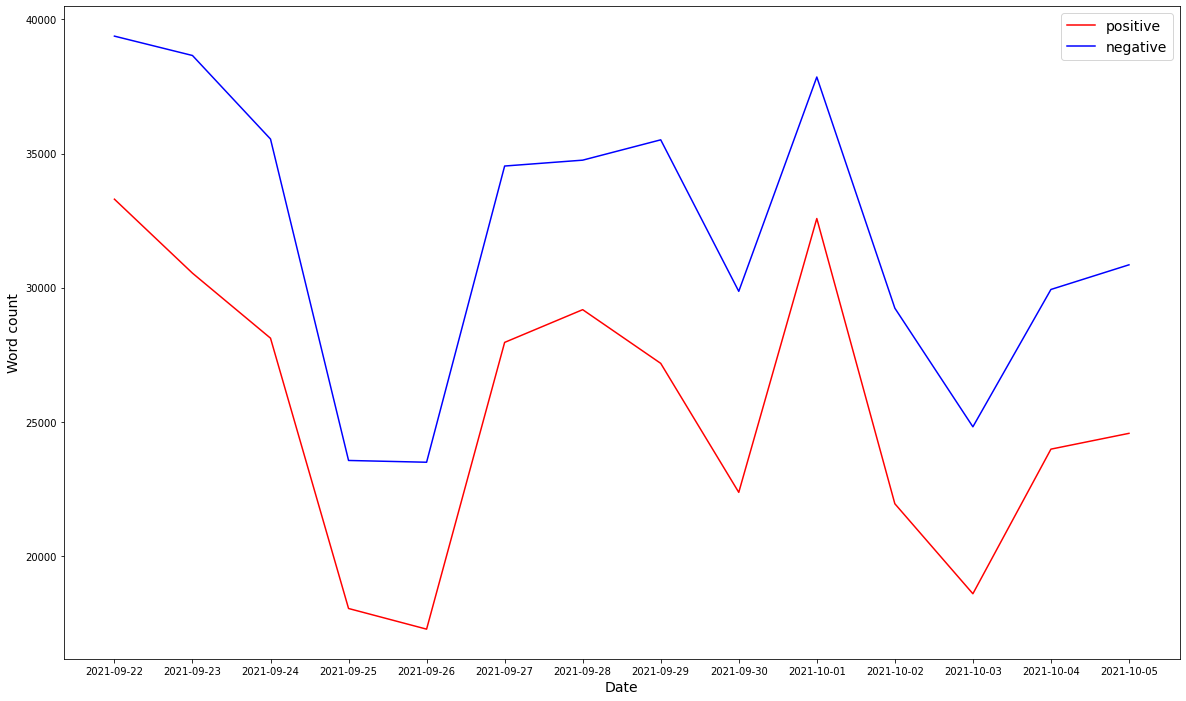

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))

plt.plot(origin_pn.positive, color = 'red')
plt.plot(origin_pn.negative, color = 'blue')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Word count", fontsize = 14)
plt.legend(['positive', 'negative'], loc = 'best', fontsize = 14)
plt.show()

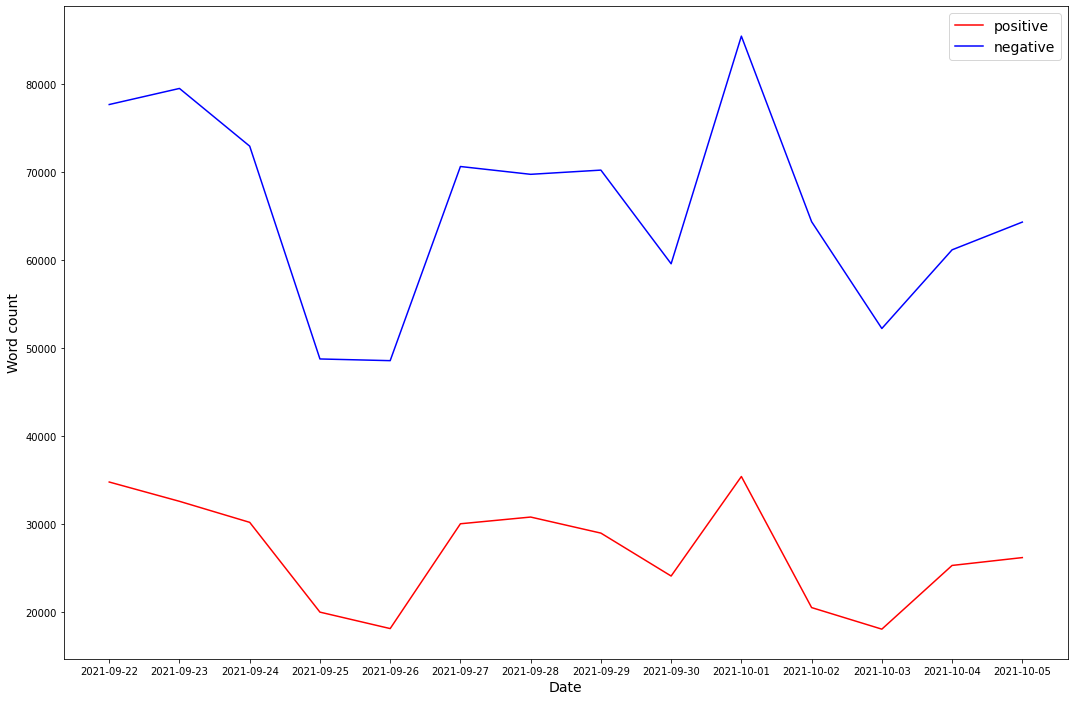

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 12))

plt.plot(daily_pn.positive, color = 'red')
plt.plot(daily_pn.negative, color = 'blue')

plt.xticks(created_at)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Word count", fontsize = 14)
plt.legend(['positive', 'negative'], loc = 'best', fontsize = 14)
plt.show()

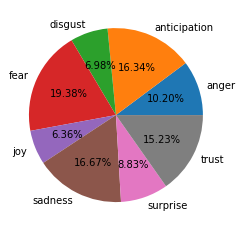

In [52]:
plt.pie(sum_daily8, labels = sentiments, autopct = '%.2f%%') # 소수점 두자리까지 표시
plt.show()